In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv('netflix_titles.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [62]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [63]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [64]:
df_copy = df
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [65]:
df_copy['director'] = df_copy['director'].fillna('Unknown')
df_copy['cast'] = df_copy['cast'].fillna('Unknown')
df_copy['country'] = df_copy['country'].fillna('Unknown')
df_copy.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [66]:
df_copy['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [67]:
valid_categories = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17','NR',
       'TV-Y7-FV', 'UR']
df['rating'] = df['rating'].apply(lambda x: x if x in valid_categories else None)
df_copy['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', None, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [68]:
mode_value = df_copy[df_copy['rating'].notna()]['rating'].mode()[0]
df_copy['rating'] = df_copy['rating'].fillna(mode_value)
df_copy.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [69]:
df_copy.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [70]:
df_copy['month'] = df_copy['date_added'].str.split(' ').str[0]
df_copy['date'] = df_copy['date_added'].str.split(' ').str[1]
df_copy['year'] = df_copy['date_added'].str.split(',').str[1]

df_copy['date'] = df_copy['date'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021


In [71]:
df_copy['month'].fillna(0)
df_copy['date'].fillna(0)
df_copy['year'].fillna(0)
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,24,2021


In [72]:
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_copy['month'] = df_copy['month'].map(month_map)
df_copy['date'] = df_copy['date'].apply(lambda x: '0' if any(month in str(x) for month in month_map) else x)
df_copy['date'] = pd.to_numeric(df_copy['date'], errors='coerce').fillna(0).astype(int)
df_copy['year'] = pd.to_numeric(df_copy['year'], errors='coerce').fillna(0).astype(int)
df_copy.head(2)
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021


In [73]:
df_copy['month'] = df_copy['month'].fillna(0)

In [74]:
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021


In [75]:
df_copy.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
month            0
date             0
year             0
dtype: int64

In [76]:
df_copy.drop('date_added',axis=1,inplace=True)

In [77]:
df_copy.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021


In [78]:
df_copy[df_copy['duration'].isnull()]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,TV-MA,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",4.0,4,2017
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,TV-MA,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,9.0,16,2016
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,TV-MA,NaN,Movies,The comic puts his trademark hilarious/thought...,8.0,15,2016


In [79]:
df_copy.loc[5541, 'duration'] = '74 min'
df_copy.loc[5794, 'duration'] = '84 min'
df_copy.loc[5813, 'duration'] = '66 min'

In [80]:
df_copy['movie_duration'] = df_copy['duration'].apply(lambda x: x if 'min' in str(x) else np.nan)
df_copy['season_duration'] = df_copy['duration'].apply(lambda x: x if 'Season' in str(x) else np.nan)
df_copy.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90 min,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,NaN,2 Seasons


In [81]:
df_copy['movie_duration'] = df_copy['movie_duration'].astype(str).str.replace(' min', '', regex=False)
df_copy['movie_duration'] = pd.to_numeric(df_copy['movie_duration'], errors='coerce')
df_copy['movie_duration'] = df_copy['movie_duration'].fillna(0).astype(int)
df_copy.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2 Seasons


In [82]:
df_copy['season_duration'] = df_copy['season_duration'].astype(str).str.replace(' Seasons', '', regex=False)
df_copy['season_duration'] = pd.to_numeric(df_copy['season_duration'], errors='coerce')
df_copy['season_duration'] = df_copy['season_duration'].fillna(0).astype(int)
df_copy.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24,2021,0,2


In [83]:
df_copy.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
release_year       0
rating             0
duration           0
listed_in          0
description        0
month              0
date               0
year               0
movie_duration     0
season_duration    0
dtype: int64

In [84]:
df_copy.drop('release_year', axis=1,inplace=True)
df_copy.drop('duration', axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   show_id          8807 non-null   object 
 1   type             8807 non-null   object 
 2   title            8807 non-null   object 
 3   director         8807 non-null   object 
 4   cast             8807 non-null   object 
 5   country          8807 non-null   object 
 6   rating           8807 non-null   object 
 7   listed_in        8807 non-null   object 
 8   description      8807 non-null   object 
 9   month            8807 non-null   float64
 10  date             8807 non-null   int64  
 11  year             8807 non-null   int64  
 12  movie_duration   8807 non-null   int64  
 13  season_duration  8807 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 963.4+ KB


In [85]:
df_copy.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
rating             0
listed_in          0
description        0
month              0
date               0
year               0
movie_duration     0
season_duration    0
dtype: int64

In [86]:
df_copy.to_csv('cleaned_data.csv', index=False)

In [87]:
df_result = df_copy.groupby('type').size().reset_index(name='count')
df_result

,type,count
0,Movie,6131
1,TV Show,2676


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23352\392624280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copy, x='type', palette='viridis')


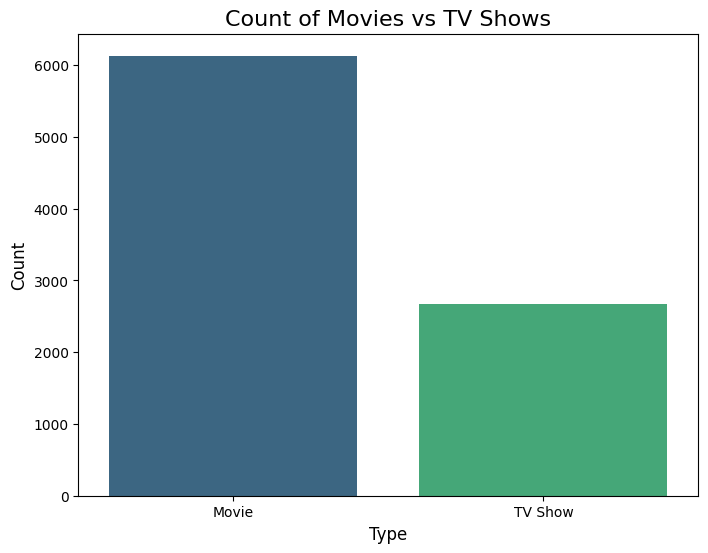

In [88]:
#Movies vs. TV Shows on Netflix
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='type', palette='viridis')
plt.title('Count of Movies vs TV Shows', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23352\3551134095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


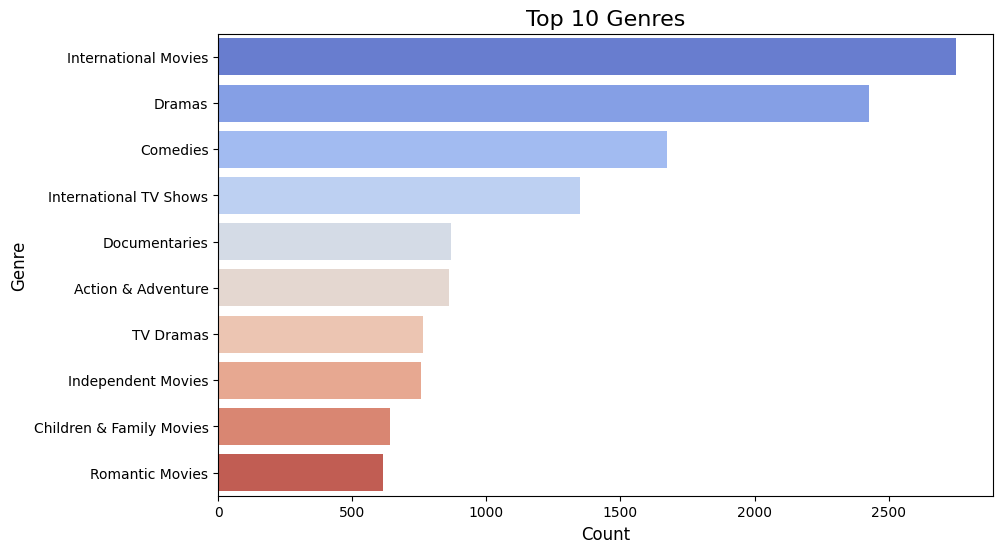

In [89]:
plt.figure(figsize=(10, 6))
genres = df_copy['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

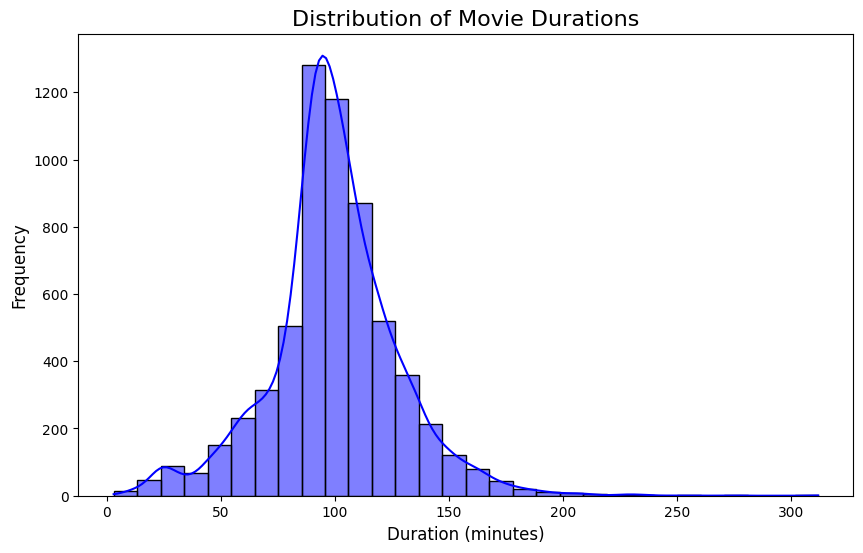

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy[df_copy['type'] == 'Movie']['movie_duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

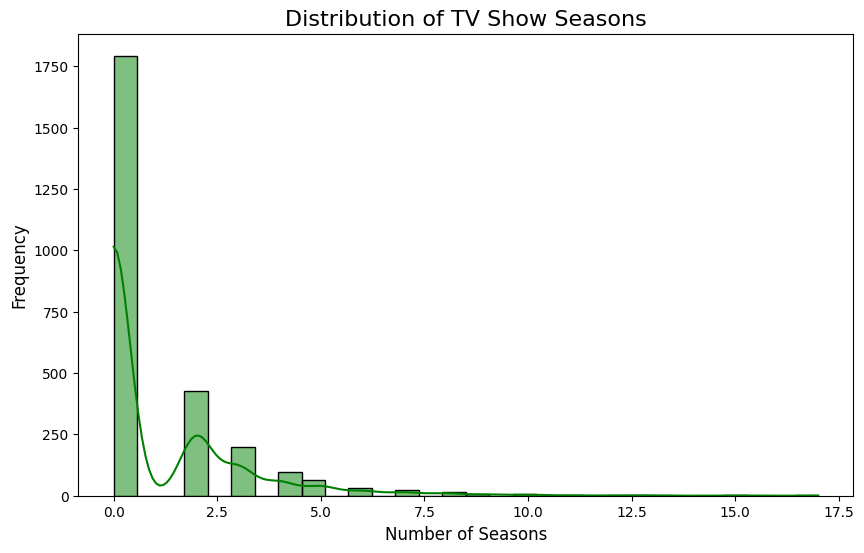

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy[df_copy['type'] == 'TV Show']['season_duration'], bins=30, kde=True, color='green')
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23352\3861939967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')


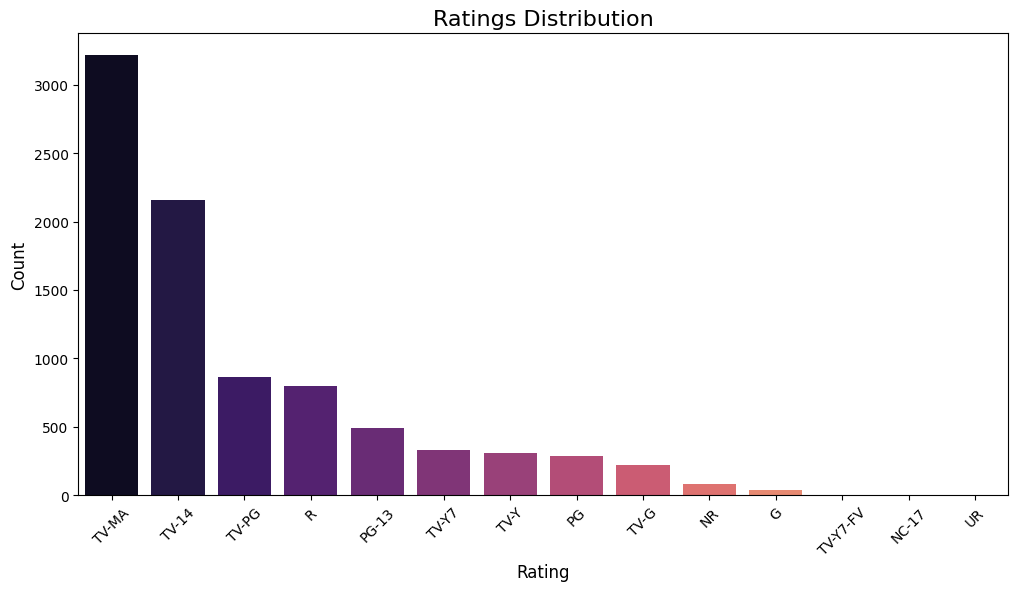

In [92]:
plt.figure(figsize=(12, 6))
rating_counts = df_copy['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='magma')
plt.title('Ratings Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23352\2982095766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_director.values, y=top_director.index, palette='coolwarm')


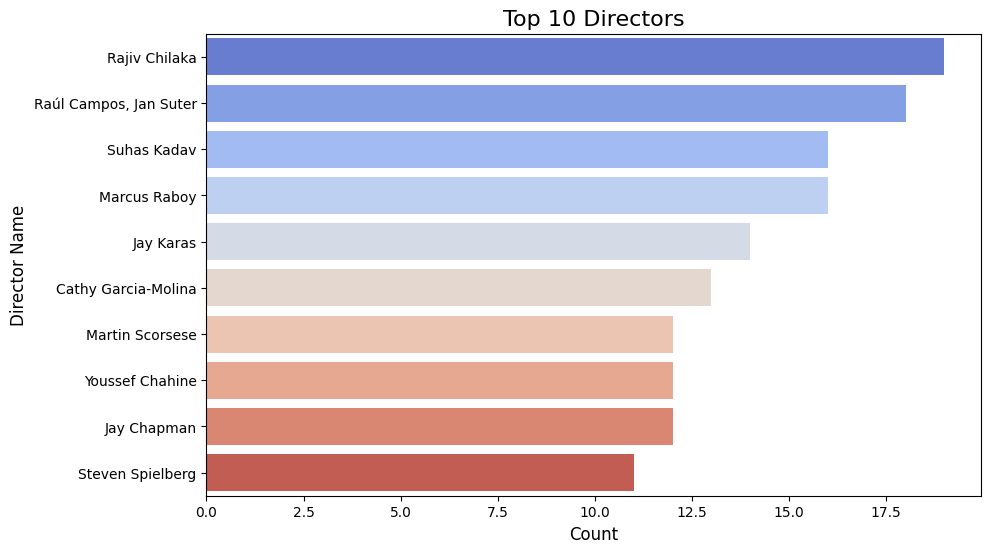

In [93]:
director_count = df_copy['director'].value_counts()
director_count = director_count[1:]
top_director = director_count.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_director.values, y=top_director.index, palette='coolwarm')
plt.title('Top 10 Directors', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Director Name', fontsize=12)
plt.show()

In [ ]:
from sqlalchemy import create_engine
import os
engine = create_engine(
    f'postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/defaultdb?sslmode=require')
table_name = 'my_data'
schema = 'public'

df_copy.to_sql(table_name,engine,schema=schema, if_exists='replace', index=False)

In [103]:
year_index =df_copy.groupby('year').size().sort_index(ascending=False).head(10).index
year_index = year_index.to_list()
year_index

[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]

In [105]:
# year_index = year_index.to_list()
df_copy[df_copy['year']==2020].groupby('month').size()
    

month
0.0       1
1.0     204
2.0     114
3.0     137
4.0     177
5.0     157
6.0     156
7.0     146
8.0     129
9.0     168
10.0    167
11.0    154
12.0    169
dtype: int64

In [110]:
movie_df = df_copy[df_copy['type']=='Movie']
movie_df.head(2)

,show_id,type,title,director,cast,country,rating,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24,2021,91,0


In [111]:
year_index =movie_df.groupby('year').size().sort_index(ascending=False).head(10).index
year_index = year_index.to_list()
year_index

[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]

In [116]:
movie_df[movie_df['year']==2018].groupby('month').size()

month
1.0     105
2.0      63
3.0     138
4.0      87
5.0      70
6.0      50
7.0     125
8.0     130
9.0      81
10.0    146
11.0    118
12.0    124
dtype: int64

In [122]:
df_copy[df_copy['year'] == 0].count()

show_id            10
type               10
title              10
director           10
cast               10
country            10
rating             10
listed_in          10
description        10
month              10
date               10
year               10
movie_duration     10
season_duration    10
dtype: int64

In [126]:
movie_df[movie_df['year']== 2021].head(1)

,show_id,type,title,director,cast,country,rating,listed_in,description,month,date,year,movie_duration,season_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,Documentaries,"As her father nears the end of his life, filmm...",9.0,25,2021,90,0


In [147]:
tv_show_df = df_copy[df_copy['type']!='Movie']
tv_show_df.head(1).title.item

<bound method IndexOpsMixin.item of 1    Blood & Water
Name: title, dtype: object>

In [140]:
movie_df.groupby('year').size()

year
2008       1
2009       2
2010       1
2011      13
2012       3
2013       6
2014      19
2015      56
2016     253
2017     839
2018    1237
2019    1424
2020    1284
2021     993
dtype: int64

In [134]:
# year_counts = tv_show_df.groupby('year').size()
# year_counts.reindex(range(df['year'].min(), df['year'].max() + 1), fill_value=0)
# year_counts
tv_show_df_without_zeor = tv_show_df[tv_show_df['year']!= 0]
year_counts  = tv_show_df_without_zeor.groupby('year').size()
year_counts = year_counts.reindex(range(tv_show_df_without_zeor['year'].min(), df['year'].max() + 1), fill_value=0)
year_counts

year
2008      1
2009      0
2010      0
2011      0
2012      0
2013      5
2014      5
2015     26
2016    176
2017    349
2018    412
2019    592
2020    595
2021    505
dtype: int64